In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hourly.csv', index_col='_time', parse_dates=True)
df.index.freq='H'

In [3]:
df.head()

,IP_Sessions(K)
_time,
2021-06-14 21:00:00-04:00,12401.270
2021-06-14 22:00:00-04:00,12326.789
2021-06-14 23:00:00-04:00,12212.849
2021-06-15 00:00:00-04:00,12106.474
2021-06-15 01:00:00-04:00,12016.950


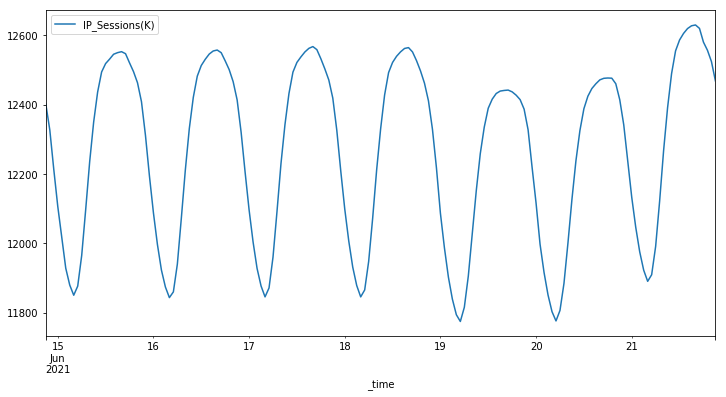

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

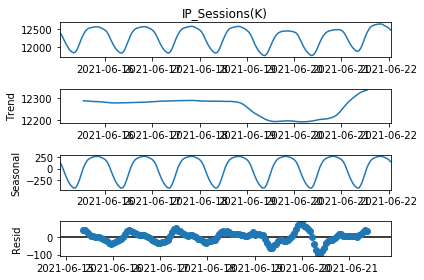

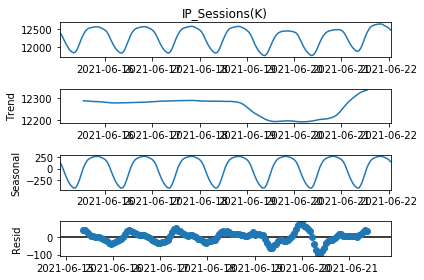

In [6]:
results=seasonal_decompose(df['IP_Sessions(K)'])
results.plot()

In [7]:
len(df)

169

In [8]:
train = df.iloc[:145]
test = df.iloc[145:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(                           IP_Sessions(K)
 _time                                    
 2021-06-14 21:00:00-04:00       12401.270
 2021-06-14 22:00:00-04:00       12326.789
 2021-06-14 23:00:00-04:00       12212.849
 2021-06-15 00:00:00-04:00       12106.474
 2021-06-15 01:00:00-04:00       12016.950,
                            IP_Sessions(K)
 _time                                    
 2021-06-21 17:00:00-04:00       12619.655
 2021-06-21 18:00:00-04:00       12579.974
 2021-06-21 19:00:00-04:00       12556.612
 2021-06-21 20:00:00-04:00       12524.127
 2021-06-21 21:00:00-04:00       12468.349)

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_test[:10]

array([[0.71516662],
       [0.58231887],
       [0.45224117],
       [0.34335048],
       [0.25365195],
       [0.18670096],
       [0.14601246],
       [0.16999351],
       [0.27292997],
       [0.43737958]])

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
#define generator
n_input = 48
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [16]:
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(generator, epochs=50)

Epoch 1/50
97/97 [==============================] - 25s 11ms/step - loss: 0.2388
Epoch 2/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0897
Epoch 3/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0815
Epoch 4/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0485
Epoch 5/50
97/97 [==============================] - 1s 11ms/step - loss: 0.0262
Epoch 6/50
97/97 [==============================] - 1s 11ms/step - loss: 0.0054
Epoch 7/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0041
Epoch 8/50
97/97 [==============================] - 1s 11ms/step - loss: 0.0037
Epoch 9/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 10/50
97/97 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 11/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 12/50
97/97 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 13/50
97/97 [=================

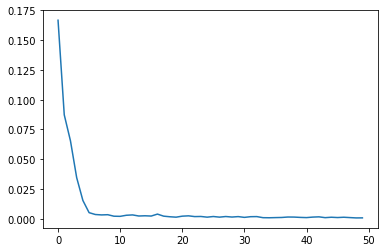

In [19]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [20]:
last_train_batch = scaled_train[-48:]

In [21]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [22]:
model.predict(last_train_batch)

array([[0.72383904]], dtype=float32)

In [23]:
scaled_test[0]

array([0.71516662])

In [24]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [25]:
test_predictions

[array([0.72383904], dtype=float32),
 array([0.6237947], dtype=float32),
 array([0.50450146], dtype=float32),
 array([0.37723696], dtype=float32),
 array([0.25770193], dtype=float32),
 array([0.16007438], dtype=float32),
 array([0.09537002], dtype=float32),
 array([0.07395219], dtype=float32),
 array([0.10503799], dtype=float32),
 array([0.19089332], dtype=float32),
 array([0.32579434], dtype=float32),
 array([0.48459643], dtype=float32),
 array([0.6258188], dtype=float32),
 array([0.73322654], dtype=float32),
 array([0.80714375], dtype=float32),
 array([0.8534145], dtype=float32),
 array([0.8792583], dtype=float32),
 array([0.8941537], dtype=float32),
 array([0.90420246], dtype=float32),
 array([0.90778893], dtype=float32),
 array([0.8982212], dtype=float32),
 array([0.8729669], dtype=float32),
 array([0.8294558], dtype=float32),
 array([0.7638344], dtype=float32)]

In [26]:
test.head()

,IP_Sessions(K)
_time,
2021-06-20 22:00:00-04:00,12341.698
2021-06-20 23:00:00-04:00,12236.477
2021-06-21 00:00:00-04:00,12133.450
2021-06-21 01:00:00-04:00,12047.204
2021-06-21 02:00:00-04:00,11976.159


In [27]:
true_predictions = scaler.inverse_transform(test_predictions)

In [28]:
test['Predictions.csv'] = true_predictions

C:\Users\karir\Documents\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


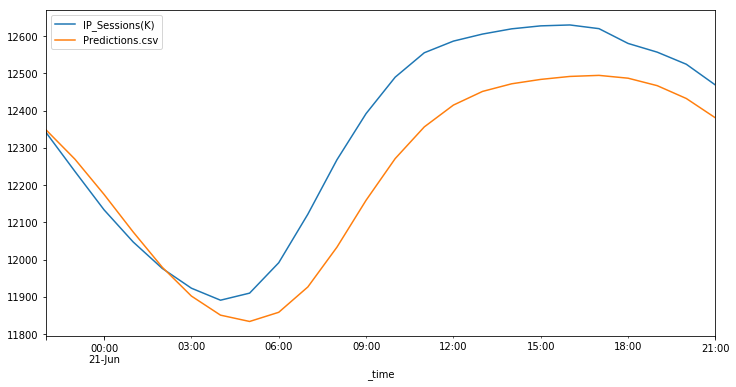

In [29]:
test.plot(figsize=(12,6))

In [30]:
test_predictions

[array([0.72383904], dtype=float32),
 array([0.6237947], dtype=float32),
 array([0.50450146], dtype=float32),
 array([0.37723696], dtype=float32),
 array([0.25770193], dtype=float32),
 array([0.16007438], dtype=float32),
 array([0.09537002], dtype=float32),
 array([0.07395219], dtype=float32),
 array([0.10503799], dtype=float32),
 array([0.19089332], dtype=float32),
 array([0.32579434], dtype=float32),
 array([0.48459643], dtype=float32),
 array([0.6258188], dtype=float32),
 array([0.73322654], dtype=float32),
 array([0.80714375], dtype=float32),
 array([0.8534145], dtype=float32),
 array([0.8792583], dtype=float32),
 array([0.8941537], dtype=float32),
 array([0.90420246], dtype=float32),
 array([0.90778893], dtype=float32),
 array([0.8982212], dtype=float32),
 array([0.8729669], dtype=float32),
 array([0.8294558], dtype=float32),
 array([0.7638344], dtype=float32)]